In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


https://www.kaggle.com/sanjanabasu/tips-dataset

In [153]:
# 빈도표 (category 형태의 데이터)
import pandas as pd
import numpy as np

party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [154]:
pd.pivot_table(tips,index='day',
                columns='size',
                values='tip',
                aggfunc='count',
                fill_value=0) # pivot_table 인자값으로 fill_value = 0 가능함.

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [155]:
pc_25 = party_counts.loc[:,2:5]
pc_25

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [156]:
pc_25.sum(axis=1) # default가 컬럼(0)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [157]:
# pc_25 각 열방향 합계 1로 정규화
# pc_25.apply(lambda x: x/pc_25.sum(axis=1))
pc_25.div(pc_25.sum(1),axis=0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

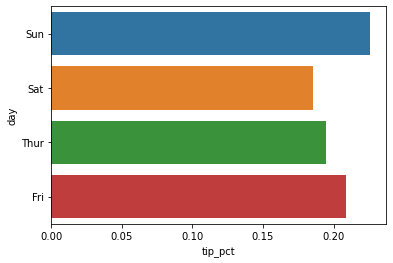

In [158]:
# 요일별 팁의 비중을 시각화
import matplotlib.pyplot as plt
import seaborn as sns

tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip']) # tip 비중
sns.barplot(x='tip_pct',y='day',data=tips,orient='h',ci=None) # ci = 선은 신뢰 구간


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

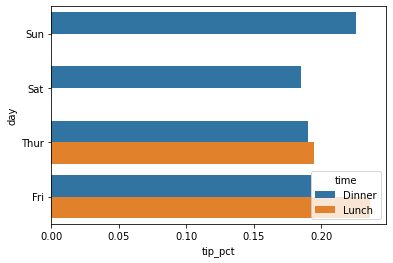

In [159]:
sns.barplot(x='tip_pct',y='day',hue='time',data=tips,orient='h',ci=None)

<AxesSubplot:xlabel='size', ylabel='count'>

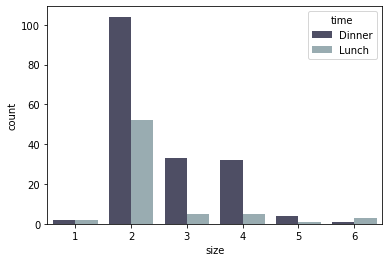

In [160]:
# countplot() # 갯 수 세는 함수
import warnings
warnings.filterwarnings('ignore')

sns.countplot('size',data=tips,hue='time',palette='bone')

In [161]:
# np.random.normal(loc 평균, scale 표준편차, size 샘플수집) : 정규분포 난수 샘플
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2])) # 행 열 방향 바꿀 수 있음
values.describe()

count    400.000000
mean       5.030125
std        5.326082
min       -3.416486
25%       -0.112600
50%        4.066454
75%       10.201270
max       15.363045
dtype: float64

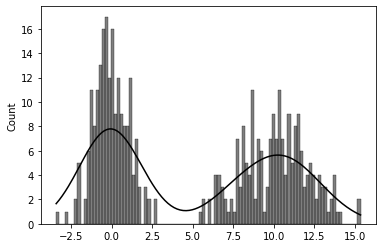

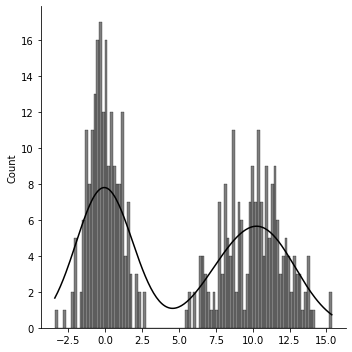

In [162]:

sns.histplot(values,bins=100,color='k',kde=True) # 그래프의 선 = kde

sns.displot(values,bins=100,color='k',kde=True)


<AxesSubplot:>

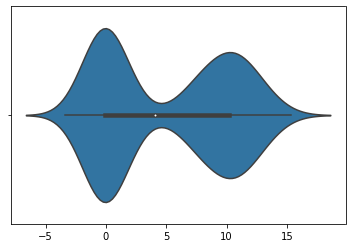

In [163]:
sns.violinplot(values)

In [164]:
fish_multi = pd.read_csv('dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='length', ylabel='Count'>

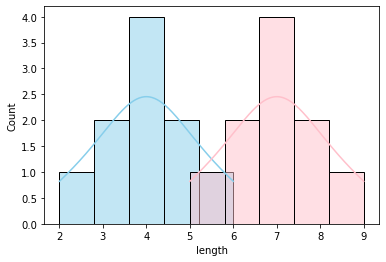

In [165]:
length_a = fish_multi.query('species=="A"')['length']
length_b = fish_multi.query('species=="B"')['length']
sns.histplot(length_a,bins=5,color='skyblue',kde=True)
sns.histplot(length_b,bins=5,color='pink',kde=True)

<AxesSubplot:xlabel='species', ylabel='length'>

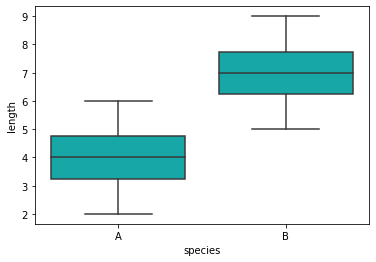

In [166]:
# boxplot
sns.boxplot(x='species',y='length',data=fish_multi,color='c')

<AxesSubplot:xlabel='species', ylabel='length'>

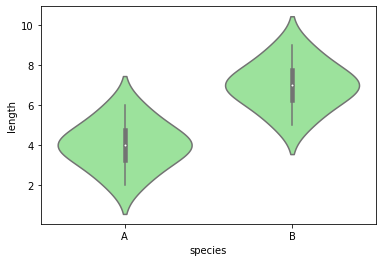

In [167]:
# 바이올린 플롯
# 커널 밀도추정의 결과를 y축 방향에 추가하여 데이터가 퍼져있는 분산의 정도 파악
sns.violinplot(x='species',y='length',data=fish_multi,color='lightgreen')

In [168]:
cov_data = pd.read_csv('dataset/4_cov.csv')
cov_data.head()

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45


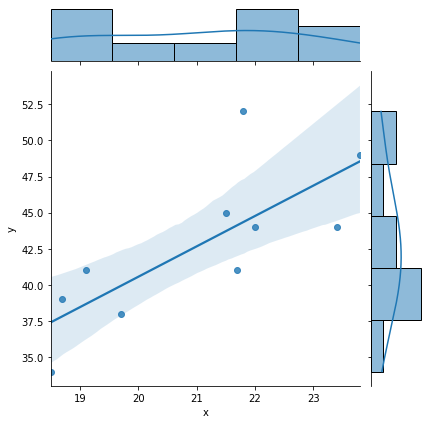

In [169]:
# 산점도, 오차 차이의 합이 최소가 되게하는 선
sns.jointplot(cov_data.x,cov_data.y,kind='reg')

In [170]:
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


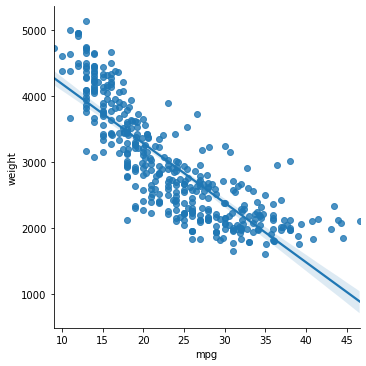

In [171]:
sns.lmplot(x='mpg',y='weight',data=df_auto)

<AxesSubplot:xlabel='mpg', ylabel='weight'>

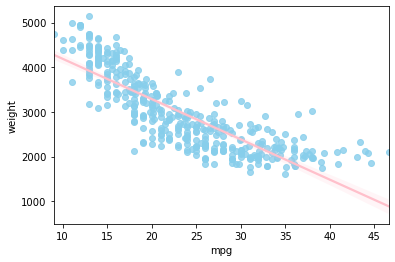

In [172]:
# sns.regplot(x='mpg',y='weight',data=df_auto,scatter_kws={'color':'skyblue'},line_kws={'color':'pink'},fit_reg=False) #fit_reg = 선 표시
sns.regplot(x='mpg',y='weight',data=df_auto,scatter_kws={'color':'skyblue'},line_kws={'color':'pink'}) # fit_reg default = True


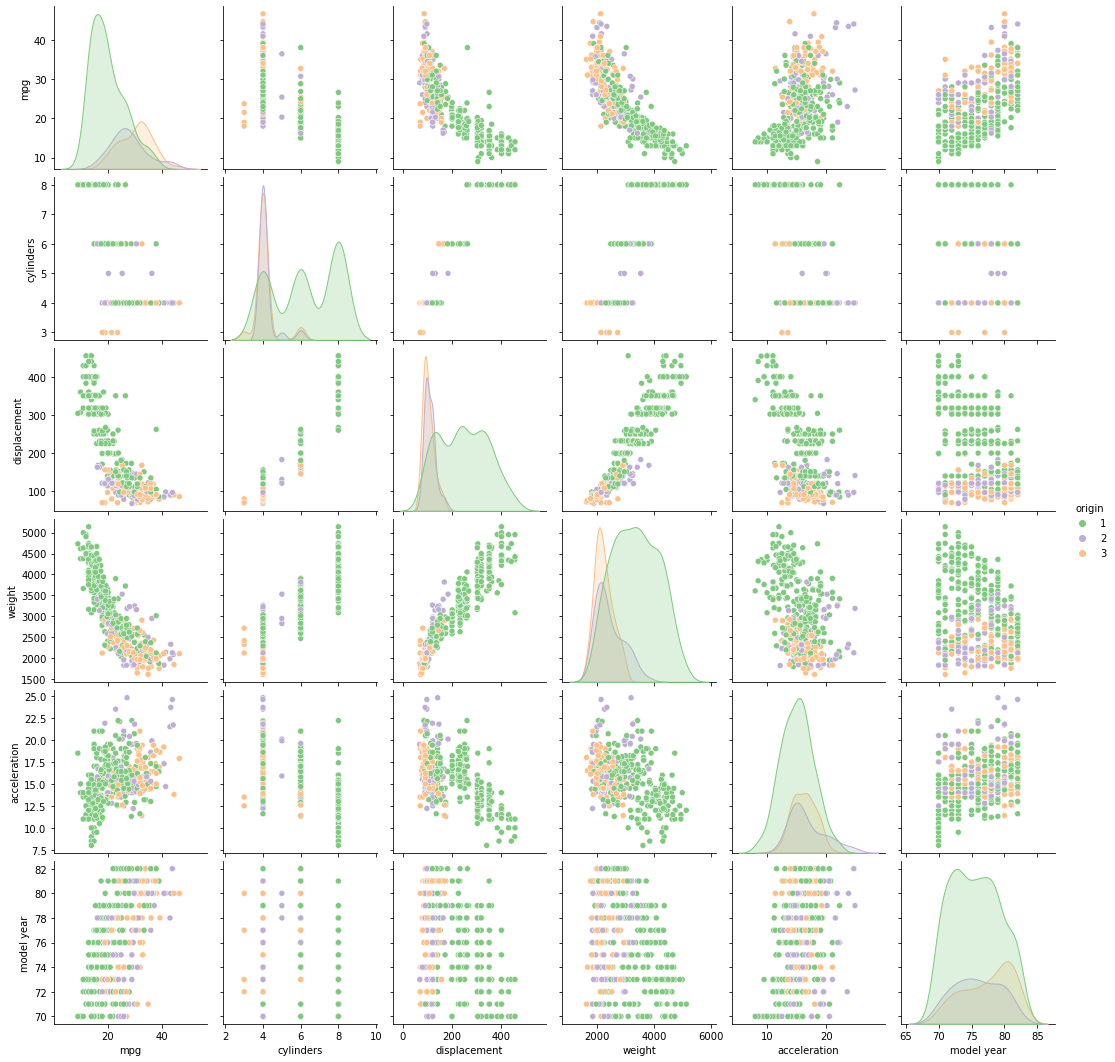

In [191]:
sns.pairplot(df_auto,palette='Accent',hue='origin') 

Text(0.5, 1.0, 'Heatmap of the Dataset')

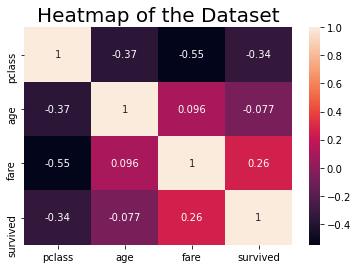

In [174]:
t_df = sns.load_dataset('titanic')
t_df[['pclass','age','fare','survived']].corr()
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)


In [175]:
table = t_df.pivot_table(index=['sex'],columns=['class'],values=['survived'],aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

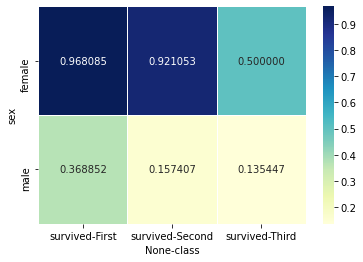

In [176]:
sns.heatmap(table,annot=True,fmt='f',cmap='YlGnBu',linewidths=0.5,cbar=True)
# cmap ='Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            # 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            # 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

In [192]:
fish_data = np.array([5,7,9,1,5,6,6,2,4,4,5,6,7,3,8,10])


<AxesSubplot:ylabel='Count'>

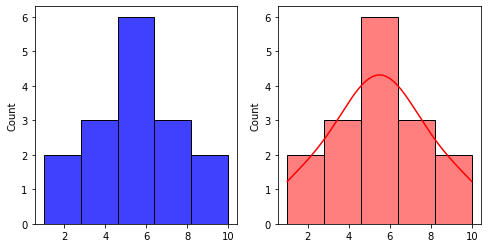

In [202]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.histplot(fish_data,color='blue',kde=False,ax=ax1)
sns.histplot(fish_data,color='red',kde=True,ax=ax2)